In [1]:
%load_ext sql
%matplotlib inline

In [2]:
%sql sqlite:///../data/rambam.sqlite

'Connected: @../data/rambam.sqlite'

In [3]:
%%sql 
SELECT 
    patient_id,
    gender,
    entry_group,
    first_department,
    age,
    entry_date
FROM visits 
LIMIT 5;

 * sqlite:///../data/rambam.sqlite
Done.


patient_id,gender,entry_group,first_department,age,entry_date
10000037,2,2,51,45,2004-04-28 10:16:56.000000
10000090,2,1,1,65,2004-04-28 23:29:25.000000
10000091,2,1,1,78,2004-04-02 15:11:31.000000
10000094,2,1,1,34,2004-04-20 11:51:24.000000
10000096,2,1,1,98,2004-04-18 17:18:07.000000


In [4]:
%%sql 
SELECT 
    patient_id,
    gndr.name AS gender,
    entry_group.name AS entry_point,
    department.name AS entry_department,
    age,
    entry_date
FROM visits 
JOIN 
    gender AS gndr ON gndr.code = visits.gender
JOIN    
    entry_group ON entry_group.code = visits.entry_group
JOIN    
    department ON department.code = visits.first_department    
LIMIT 5;

 * sqlite:///../data/rambam.sqlite
Done.


patient_id,gender,entry_point,entry_department,age,entry_date
10112398,Male,Emergency Room,Emergency Internal Medicine Unit,45,2004-10-27 11:28:23.000000
10112398,Male,Emergency Room,Emergency Internal Medicine Unit,45,2005-01-25 13:35:49.000000
10112399,Male,Emergency Room,Emergency Internal Medicine Unit,50,2005-01-11 11:57:11.000000
10112400,Male,Emergency Room,Emergency Internal Medicine Unit,71,2005-01-28 19:27:57.000000
10112401,Male,Emergency Room,Emergency Internal Medicine Unit,33,2005-01-31 09:31:35.000000


In [5]:
%%sql 
genders << 
SELECT 
    gndr.name AS gender,
    count(gndr.code) AS total
FROM visits 
JOIN 
    gender AS gndr ON gndr.code = visits.gender
GROUP BY
    gndr.code;

 * sqlite:///../data/rambam.sqlite
Done.
Returning data to local variable genders


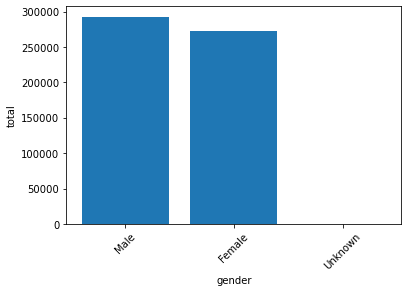

In [6]:
genders.bar();